# Titanic Dataset - Exploratory Data Analysis (EDA)

## Project Overview
This project explores the Titanic dataset to identify key factors influencing passenger survival.

The analysis includes:
- Data cleaning
- Feature engineering
- Exploratory visualizations
- Correlation analysis
- Outlier detection
- Business insights

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
sns.set_context("talk")

In [6]:
df = pd.read_csv('26__titanic.csv', sep=",")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [8]:
df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [9]:
df.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

### Key Observations
- Dataset contains 1310 rows (full dataset)
- Missing values are present in Age, Cabin, and Embarked
- Majority of passengers traveled in 3rd class

In [11]:
# Convert Sex to numeric
df['Sex_num'] = df['sex'].map({'male':0, 'female':1})

In [12]:
# Family size feature
df['FamilySize'] = df['sibsp'] + df['parch'] + 1

In [13]:
# Age groups
bins = [0, 12, 20, 40, 60, 80]
labels = ['Child', 'Teen', 'Adult', 'Middle Age', 'Senior']
df['AgeGroup'] = pd.cut(df['age'], bins=bins, labels=labels)

### Feature Engineering
Additional features were created to better understand survival patterns.

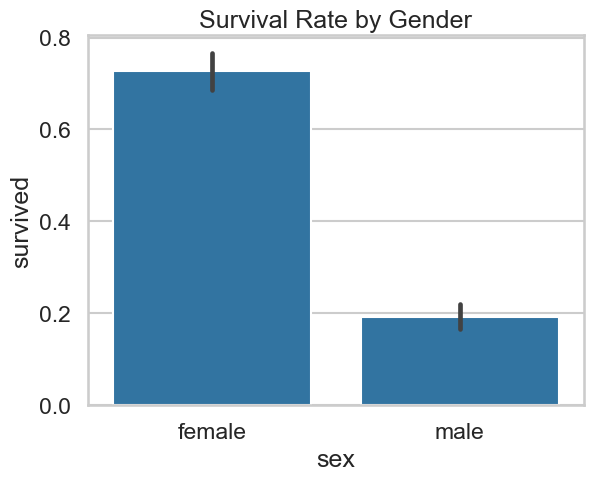

In [14]:
sns.barplot(x='sex', y='survived', data=df)
plt.title("Survival Rate by Gender")
plt.show()

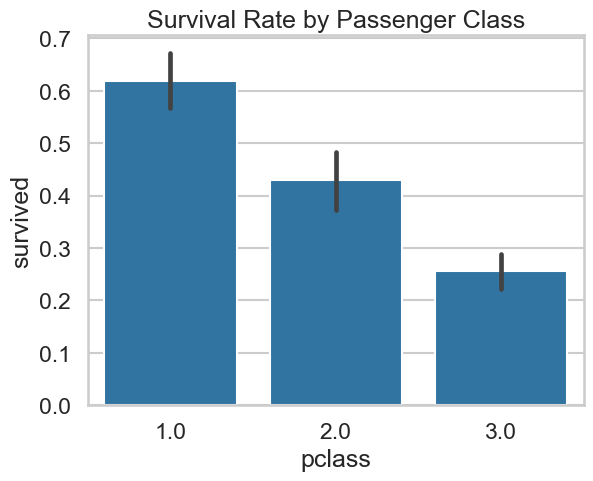

In [15]:
sns.barplot(x='pclass', y='survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

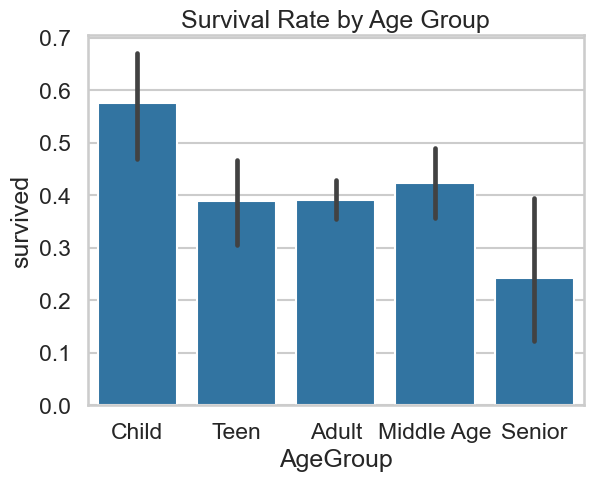

In [16]:
sns.barplot(x='AgeGroup', y='survived', data=df)
plt.title("Survival Rate by Age Group")
plt.show()

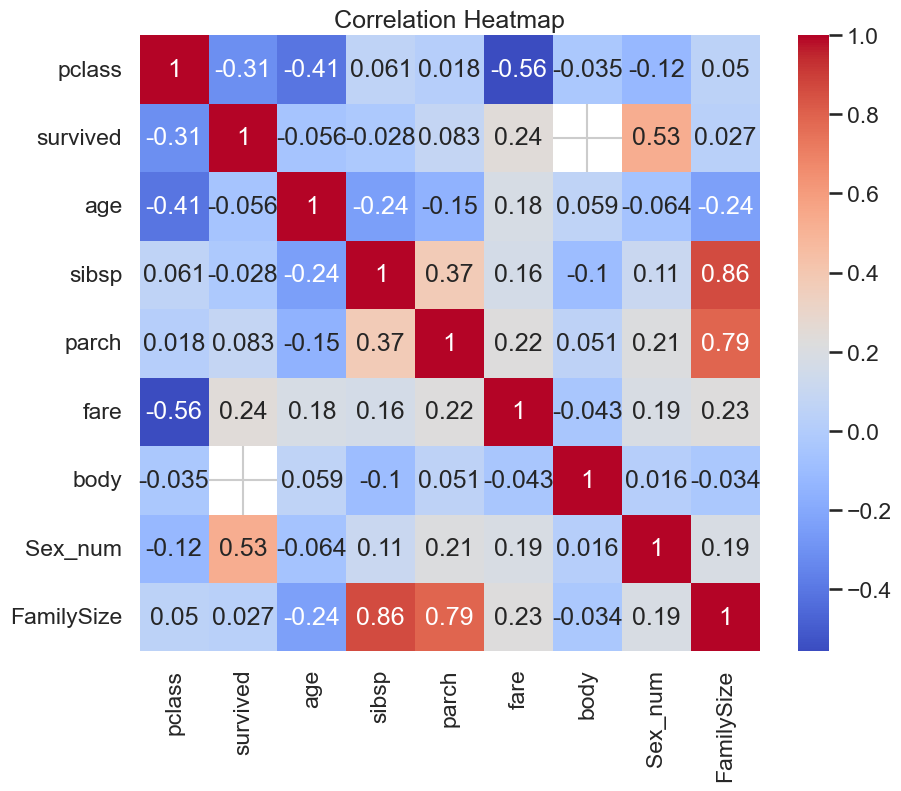

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

### Correlation Insights
- Sex has strong correlation with survival
- Passenger class significantly impacts survival probability

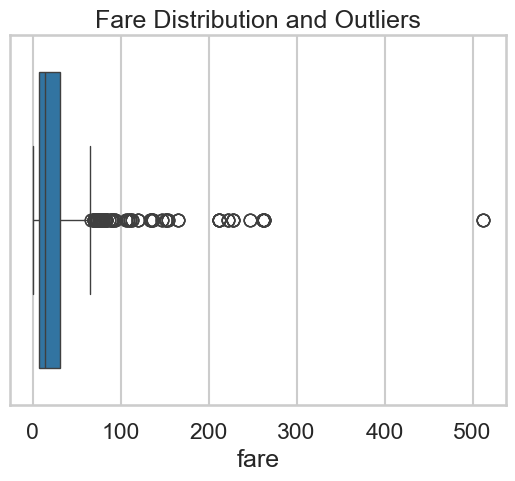

In [18]:
sns.boxplot(x=df['fare'])
plt.title("Fare Distribution and Outliers")
plt.show()

# Conclusions

1. Gender was the strongest survival predictor – women had significantly higher survival rates.
2. First-class passengers had a much higher survival probability.
3. Children had better survival chances compared to middle-aged adults.
4. Ticket fare correlates with survival, indicating socio-economic status impact.
5. Large families had lower survival rates.

These insights could be used to build a predictive machine learning model.